# BackGround

The dataset contains transactions made by credit cards in September 2013 by European cardholders.
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Due to confidentiality issues, we cannot have the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

Go ahead and run the following cells to get started with data

Source: https://www.kaggle.com/mlg-ulb/creditcardfraud?select=creditcard.csv


# Import Libraries</p>
 ⬆️[Table Contents](#table_content)

In [25]:
#importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import math
import sklearn

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split,GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier  

from sklearn.metrics import confusion_matrix, roc_curve, precision_recall_curve,accuracy_score,precision_score
from sklearn.metrics import classification_report,recall_score,f1_score

import warnings 
warnings.filterwarnings('ignore')
%matplotlib inline

#  Read Dataset</p>
 ⬆️[Table Contents](#table_content)

In [26]:
#Reading dataset
df = pd.read_csv('creditcard.csv')

In [27]:
df.shape

(284807, 31)

In [28]:
pd.set_option('display.max_columns',32)

In [29]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


#  Dataset Overview</p>
 ⬆️[Table Contents](#table_content)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

<div style="background-color: #f0f8ff; padding: 10px 12px; border: 2px solid #007bff; border-radius: 10px;">
    
<b>Inference</b>:<br>

- The dataset contains 284807 entries.
- There are 31 different features.
- There are no null values in the dataset.
- The target variable is "Class", which represents the status of the transaction whether it is fraud or legitimate i.e. it is a categorical feature.
- Further analysis could involve exploring relationships between different features and the transaction status, as well as building predictive models to classify transaction based on their status.

## 3.1: Summary Statistics for Independent Features

 ⬆️[Table Contents](#table_content)

In [31]:
df[["Time","Amount"]].describe()

,Time,Amount
count,284807.000000,284807.000000
mean,94813.859575,88.349619
std,47488.145955,250.120109
min,0.000000,0.000000
25%,54201.500000,5.600000
50%,84692.000000,22.000000
75%,139320.500000,77.165000
max,172792.000000,25691.160000


<div style="background-color: #f0f8ff; padding: 10px 12px; border: 2px solid #007bff; border-radius: 10px;">
    <b>Inference</b>:<br>
    <ul style="list-style-type: square; color: #004085;">
        <li><b>Amount:</b>
            <ul style="list-style-type: disc; color: #004085;">
                <li>The amount feature in the dataset has a mean value of <b>\$88.35</b> with a standard deviation of <b>\$250.12</b>.</li>
                <li>The minimum amount is <b>\$0</b> , while the maximum amount is <b>\$25691.16</b>.</li>
                <li>Additionally, <b>25\%</b> of the transactions have an amount of <b>\$5.60</b> or less, <b>50\%</b> have an amount of <b>\$22.00</b> or less, and <b>75\%</b> have an amount of <b>\$77.17</b> or less.</li>
            </ul>
        </li>
        <li><b>Time:</b>
            <ul style="list-style-type: disc; color: #004085;">
                <li>"Time" feature indicate that it ranges from 0 to 172792, with a mean value of approximately 94813.86 and a standard deviation of approximately 47488.15.</li>
                <li>Additionally, <b>25%</b> of the values are below 54201.5, <b>50%<b/> are below 84692.0, and <b>75%</b> are below 139320.5.</li>
            </ul>

## 3.2: Summary Statistics for Target Features
 ⬆️[Table Contents](#table_content)

In [32]:
df["Class"].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [33]:
fraud = round(len(df[df['Class']==1])/len(df)*100,2)
nofraud = round(len(df[df['Class']==0])/len(df)*100,2)

print("No fraud transactions are:",str(nofraud)+'%',"of the dataset")
print("Fraud transactions are:",str(fraud)+'%',"of the dataset")

No fraud transactions are: 99.83% of the dataset
Fraud transactions are: 0.17% of the dataset


<div style="background-color: #f0f8ff; padding: 10px 12px; border: 2px solid #007bff; border-radius: 10px;">
    
<b>Inference</b>:<br>
    - The dataset is highly unbalanced.

#  EDA</p>
 ⬆️[Table Contents](#table_content)

Taking the following as features we are going to do univariate and bivariate analysis, 

1. Class
2. Amount
3. Transaction time
4. all the remaining features[V1....V28]

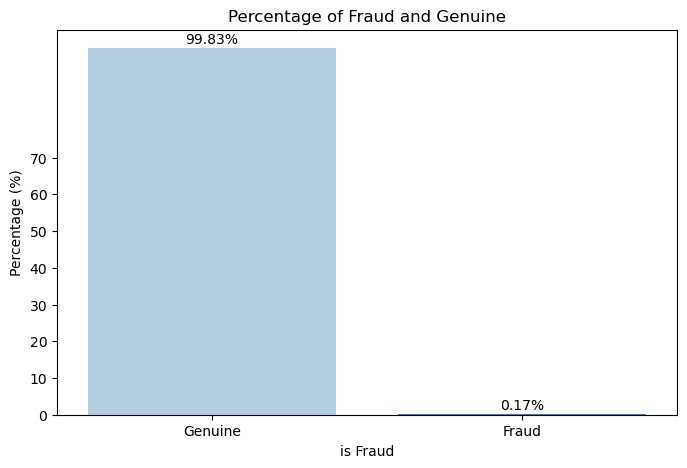

In [34]:
# Calculating the percentage of each class
percentage = df['Class'].value_counts(normalize=True) * 100

# Plotting the percentage of each class
plt.figure(figsize=(8, 5))
ax = sns.barplot(x=percentage.index, y=percentage, palette='Blues')
plt.title('Percentage of Fraud and Genuine')
plt.xlabel('is Fraud')
plt.ylabel('Percentage (%)')
plt.xticks(ticks=[0, 1], labels=['Genuine','Fraud'])
plt.yticks(ticks=range(0,80,10))

# Displaying the percentage on the bars
for i, p in enumerate(percentage):
    ax.text(i, p + 0.5, f'{p:.2f}%', ha='center', va='bottom')

plt.show()

<div style="background-color: #f0f8ff; padding: 10px 12px; border: 2px solid #007bff; border-radius: 10px;">

We can see that class variable is highly imbalanced as we already know

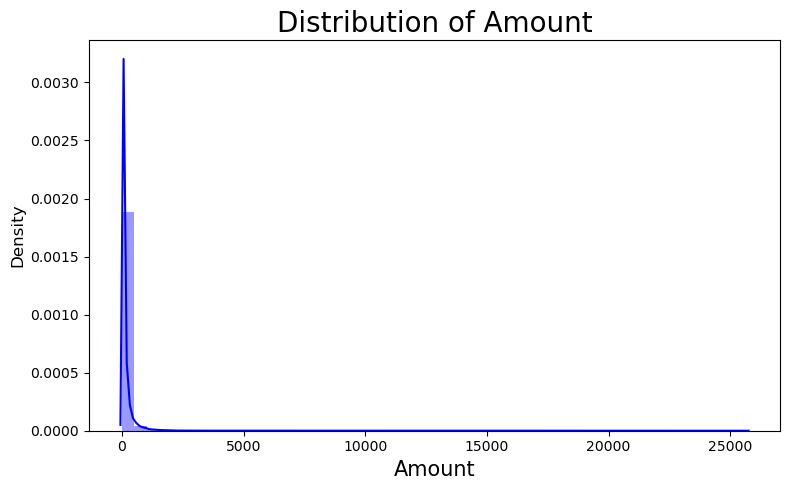

In [35]:
plt.figure(figsize=(8, 5))
sns.distplot(df["Amount"], kde=True, color='blue')
plt.xlabel("Amount", fontsize=15)
plt.ylabel('Density', fontsize=12)
plt.title('Distribution of Amount', fontsize=20)
plt.tight_layout()
plt.show()

<div style="background-color: #f0f8ff; padding: 10px 12px; border: 2px solid #007bff; border-radius: 10px;">

The amount variable is mostly dense around the samllar amount regions.

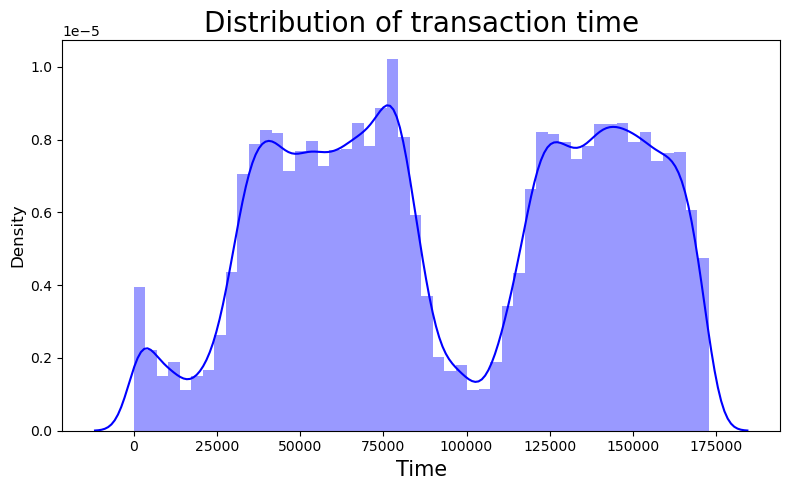

In [36]:
plt.figure(figsize=(8, 5))
sns.distplot(df["Time"], kde=True, color='blue')
plt.xlabel("Time", fontsize=15)
plt.ylabel('Density', fontsize=12)
plt.title('Distribution of transaction time', fontsize=20)
plt.tight_layout()
plt.show()

<div style="background-color: #f0f8ff; padding: 10px 12px; border: 2px solid #007bff; border-radius: 10px;">

Time feature follows **bimodal distribution** i.e. the peak rises and falls down and rises again. The fall might happen due to night time.

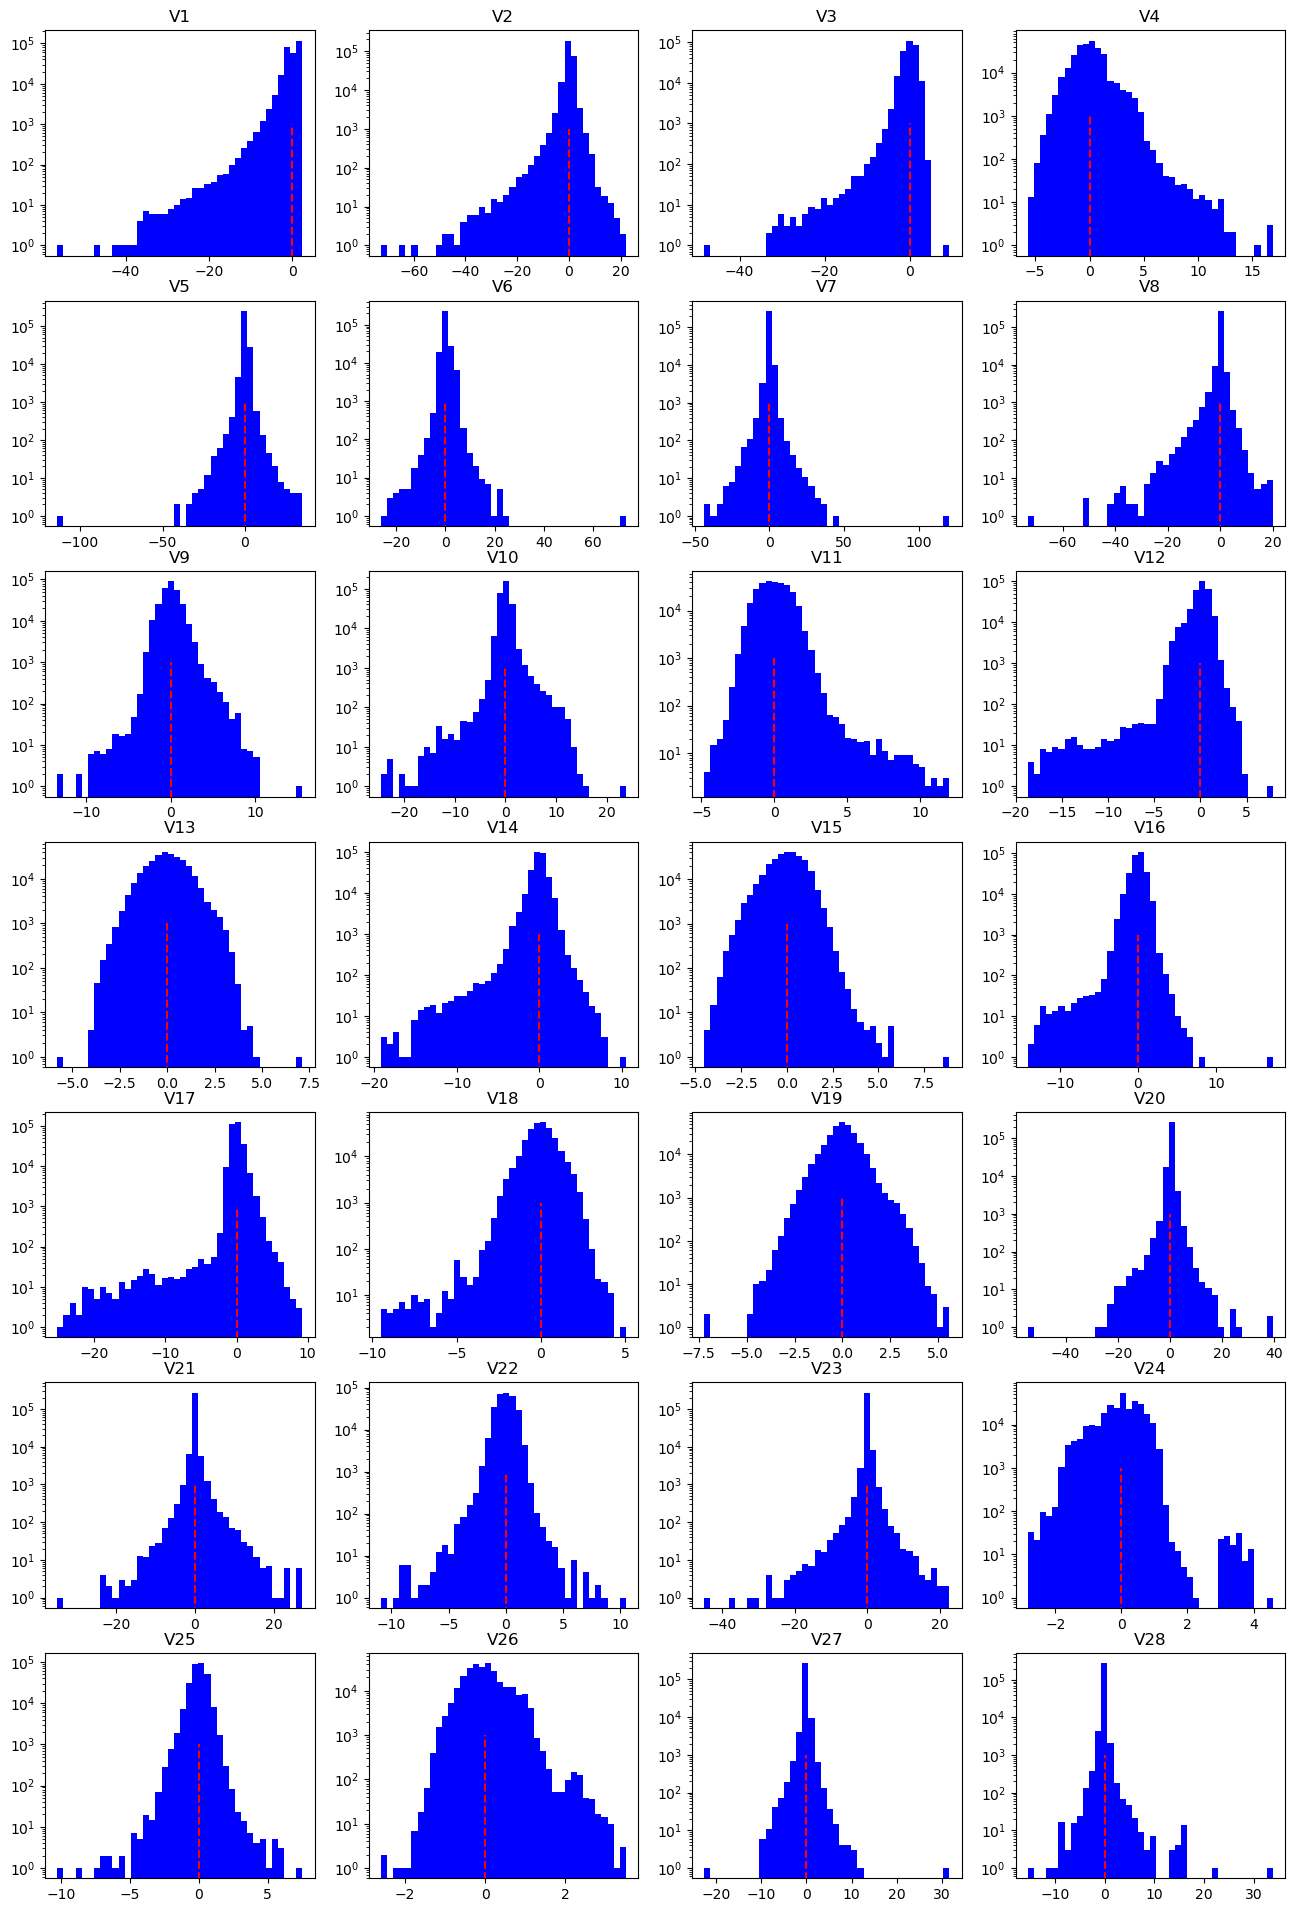

In [37]:
#distribution of the different features

fig, ax = plt.subplots(nrows=7,ncols=4,figsize=(16,24))

for i in range(1,29):
    m = (i-1)//4
    n = (i-1)%4
    col = 'V' + str(i)
    ax[m,n].hist(df[col],bins=40, color='b')
    ax[m,n].set_title(col)
    ax[m,n].vlines(x=df[col].mean(),ymin=0,ymax=10**3,linestyle='dashed',colors='r')
    ax[m,n].set_yscale('log')

## 4.2: Bivariate Analysis
<a id="4.2"></a>
 ⬆️[Table Contents](#table_content)

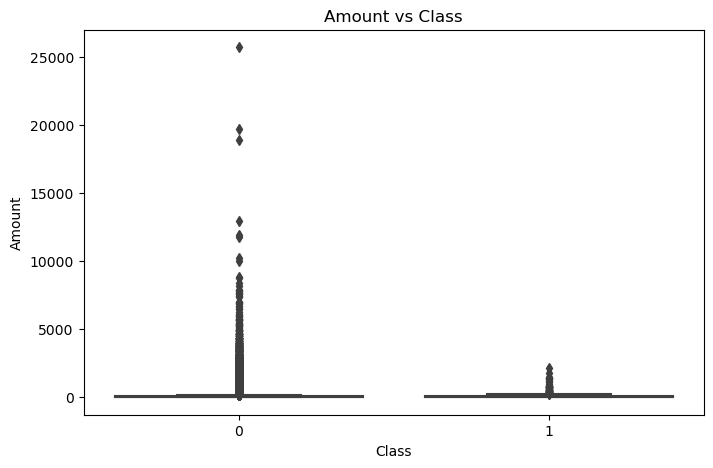

In [38]:
#Class vs Amount

plt.figure(figsize=(8, 5))
sns.boxplot(x='Class',y='Amount',data=df)
plt.title('Amount vs Class')
plt.show()

<div style="background-color: #f0f8ff; padding: 10px 12px; border: 2px solid #007bff; border-radius: 10px;">
It can be clearly observed that there are very less data points having amount greater than 10,000(all in the non-fraudulent category).

In [39]:
#checking the above observation
df[df['Amount']>10000]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
46841,42951.0,-23.712839,-42.172688,-13.320825,9.925019,-13.945538,5.564891,15.710644,-2.844253,-1.580725,-5.533256,1.446695,0.902675,1.746979,2.354131,0.801598,2.068475,1.413407,0.748320,-3.637371,26.237391,7.921600,-6.320710,-11.310338,0.404175,-4.547278,-1.577118,-2.357385,2.253662,12910.93,0
54018,46253.0,-21.780665,-38.305310,-12.122469,9.752791,-12.880794,4.256017,14.785051,-2.818253,-0.667338,-5.545590,1.067549,0.832726,1.592166,2.788521,2.569520,2.721505,-0.613875,3.490798,-3.838863,24.133894,7.437478,-5.619439,-10.547038,0.653249,-4.232409,-0.480459,-2.257913,2.082488,11898.09,0
58465,48401.0,-36.802320,-63.344698,-20.645794,16.715537,-20.672064,7.694002,24.956587,-4.730111,-2.687312,-8.423404,1.186360,1.879982,3.496723,4.082503,1.406178,0.773133,0.902964,5.041069,-7.213527,39.420904,11.455313,-10.933144,-17.173665,1.180700,-7.025783,-2.534330,-3.602479,3.450224,19656.53,0
151296,95286.0,-34.549296,-60.464618,-21.340854,16.875344,-19.229075,6.335259,24.422716,-4.964566,0.188912,-8.908182,-0.083514,-2.281866,3.739366,5.989210,2.582162,3.032874,0.530779,4.712398,-6.938297,38.117209,11.502580,-9.499423,-16.513186,0.744341,-7.081325,-2.604551,-3.550963,3.250802,18910.00,0
169457,119713.0,-20.924897,-37.943452,-14.060281,10.473005,-10.866639,6.256654,14.960521,-2.392155,-0.597076,-5.341249,0.713033,1.361297,1.410760,2.969936,1.441114,1.134212,0.297532,1.340820,-4.392421,23.649095,6.829810,-6.926353,-9.928657,-0.447084,-4.848151,-2.241620,-2.140723,2.001492,11789.84,0
274771,166198.0,-35.548539,-31.850484,-48.325589,15.304184,-113.743307,73.301626,120.589494,-27.347360,-3.872425,-12.005487,6.853897,-9.189418,7.126883,-6.795942,8.877742,17.315112,-7.173805,-1.968044,5.501747,-54.497720,-21.620120,5.712303,-1.581098,4.584549,4.554683,3.415636,31.612198,-15.430084,25691.16,0
284249,172273.0,-9.030538,-11.112584,-16.233798,3.592021,-40.427726,23.917837,44.054461,-7.277778,-4.210637,-7.776435,0.214173,-4.499851,0.241005,0.537895,2.901938,2.326099,-0.402142,1.257379,2.008145,2.454553,-0.269048,0.988144,7.040028,0.347693,2.520869,2.342495,3.478175,-2.713136,10199.44,0


we have only 7 transaction which have amount > 10000 and they all are non-fraudulent transaction.

In [40]:
# excluding the above mentioned points
df = df[df['Amount']<10000]
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284799.000000,284799.000000,284799.000000,284799.000000,284799.000000,284799.000000,284799.000000,284799.000000,284799.000000,284799.000000,284799.000000,284799.000000,284799.000000,284799.000000,284799.000000,284799.000000,284799.000000,284799.000000,284799.000000,284799.000000,284799.000000,284799.000000,284799.000000,284799.000000,284799.000000,284799.000000,284799.000000,284799.000000,284799.000000,284799.000000,284799.000000
mean,94813.586235,0.000716,0.001123,0.000542,-0.000326,0.000800,-0.000436,-0.000897,0.000198,0.000045,0.000196,-0.000043,0.000028,-0.000071,-0.000056,-0.000083,-0.000105,0.000014,-0.000053,0.000080,-0.000419,-0.000100,0.000140,0.000326,-0.000027,0.000103,0.000019,-0.000073,0.000008,87.927043,0.001728
std,47488.019368,1.953489,1.635632,1.511555,1.414375,1.359939,1.324170,1.210706,1.193066,1.098578,1.088140,1.020636,0.998993,0.995138,0.958356,0.915110,0.875607,0.849232,0.838046,0.813619,0.752023,0.732325,0.724703,0.618721,0.605586,0.520394,0.482084,0.399034,0.328549,235.414278,0.041528
min,0.000000,-56.407510,-72.715728,-33.680984,-5.683171,-42.147898,-26.160506,-43.557242,-73.216718,-13.434066,-24.588262,-4.797473,-18.683715,-5.791881,-19.214325,-4.498945,-14.129855,-25.162799,-9.498746,-4.932733,-28.009635,-34.830382,-8.887017,-44.807735,-2.836627,-10.295397,-2.068561,-22.565679,-11.710896,0.000000,0.000000
25%,54202.500000,-0.920290,-0.598457,-0.890240,-0.848660,-0.691546,-0.768299,-0.554089,-0.208605,-0.643083,-0.535402,-0.762503,-0.405566,-0.648553,-0.425594,-0.582892,-0.468069,-0.483748,-0.498850,-0.456268,-0.211725,-0.228395,-0.542320,-0.161841,-0.354593,-0.317128,-0.326979,-0.070835,-0.052960,5.590000,0.000000
50%,84691.000000,0.018158,0.065524,0.179859,-0.019921,-0.054322,-0.274227,0.040079,0.022363,-0.051416,-0.092884,-0.032767,0.140025,-0.013586,0.050568,0.048037,0.066370,-0.065678,-0.003659,0.003741,-0.062486,-0.029452,0.006795,-0.011191,0.040964,0.016607,-0.052124,0.001343,0.011243,22.000000,0.000000
75%,139320.000000,1.315648,0.803743,1.027212,0.743302,0.611927,0.398463,0.570385,0.327356,0.597164,0.454005,0.739561,0.618202,0.662438,0.493112,0.648780,0.523268,0.399655,0.500757,0.458949,0.133017,0.186367,0.528554,0.147642,0.439524,0.350716,0.240952,0.091045,0.078277,77.150000,0.000000
max,172792.000000,2.454930,22.057729,9.382558,16.491217,34.801666,22.529298,36.877368,20.007208,15.594995,23.745136,12.018913,7.848392,4.569009,10.526766,5.825654,8.289890,9.253526,4.295648,5.591971,23.643417,27.202839,10.503090,22.528412,4.022866,7.519589,3.517346,12.152401,33.847808,8790.260000,1.000000


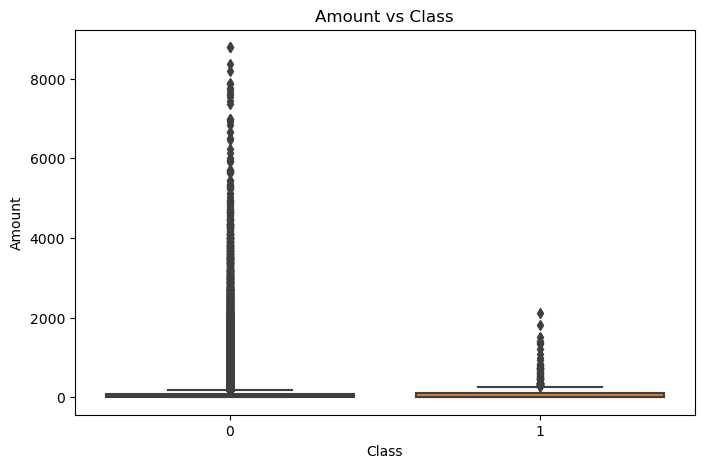

In [41]:
# Amount Vs Class

plt.figure(figsize=(8, 5))
sns.boxplot(x='Class',y='Amount',data=df)
plt.title('Amount vs Class')
plt.show()

<div style="background-color: #f0f8ff; padding: 10px 12px; border: 2px solid #007bff; border-radius: 10px;">

Let's add "Time_min"(minute) and "Time_hour"(hour) column to our data to see if we can get some more insigths.

In [42]:
#Amount vs time distribution

data_new = df.copy()
timedelta = pd.to_timedelta(data_new['Time'],unit='s')

data_new['Time_min'] = (timedelta.dt.components.minutes).astype(int)
data_new['Time_hour'] = (timedelta.dt.components.hours).astype(int)

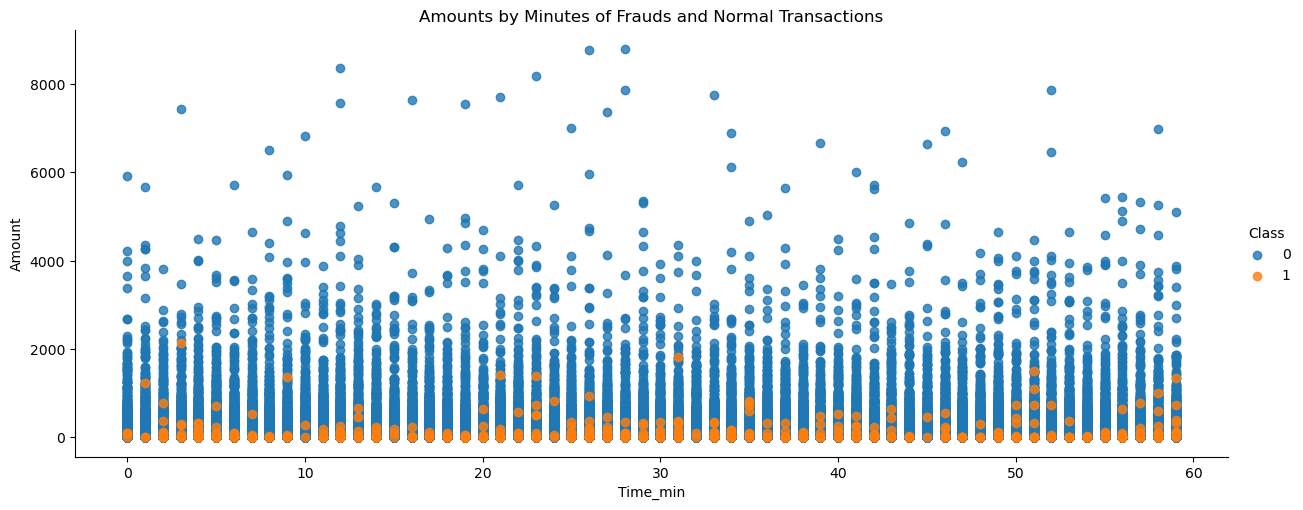

In [43]:
ax = sns.lmplot(y='Amount',x='Time_min',fit_reg=False,aspect=2.5,data=data_new,hue='Class')
plt.title("Amounts by Minutes of Frauds and Normal Transactions",fontsize=12)
plt.show()

<div style="background-color: #f0f8ff; padding: 10px 12px; border: 2px solid #007bff; border-radius: 10px;">

So as we can see transactions both fraud and legitimate are more or less uniformly distributed throughout Time_min.

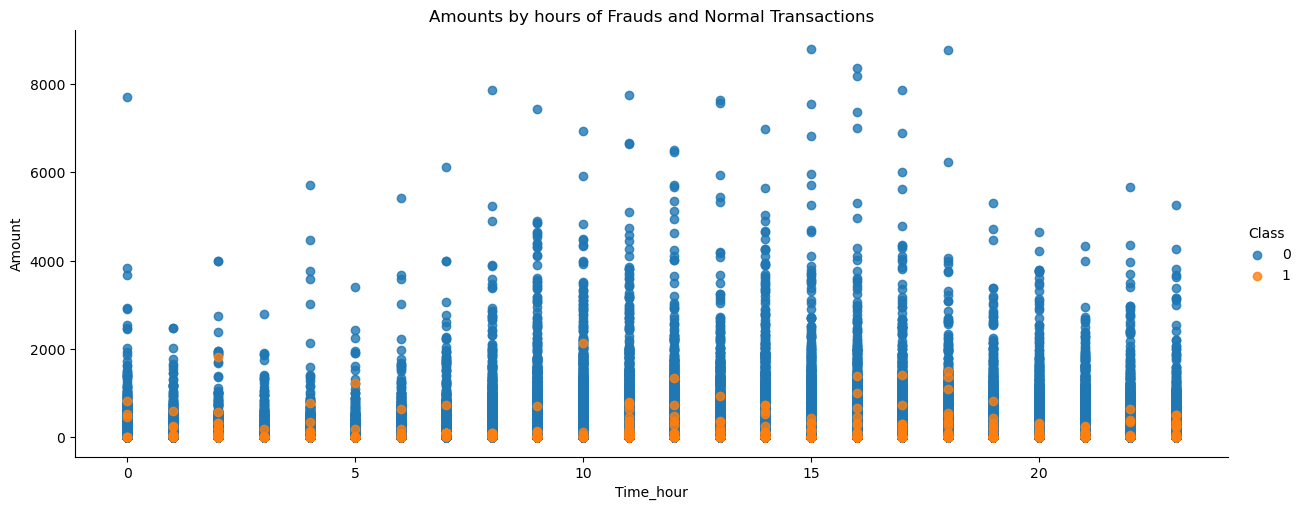

In [44]:
ax = sns.lmplot(y='Amount',x='Time_hour',fit_reg=False,aspect=2.5,data=data_new,hue='Class')
plt.title("Amounts by hours of Frauds and Normal Transactions",fontsize=12)
plt.show()

<div style="background-color: #f0f8ff; padding: 10px 12px; border: 2px solid #007bff; border-radius: 10px;">

Now transactions show a more non uniform disribution accross Time_hour which makes sense but still we can not see any particular pattern to distinguish fraud and non-fraud from this analysis, non-fraud volume is more on active hour compared to lean hours.

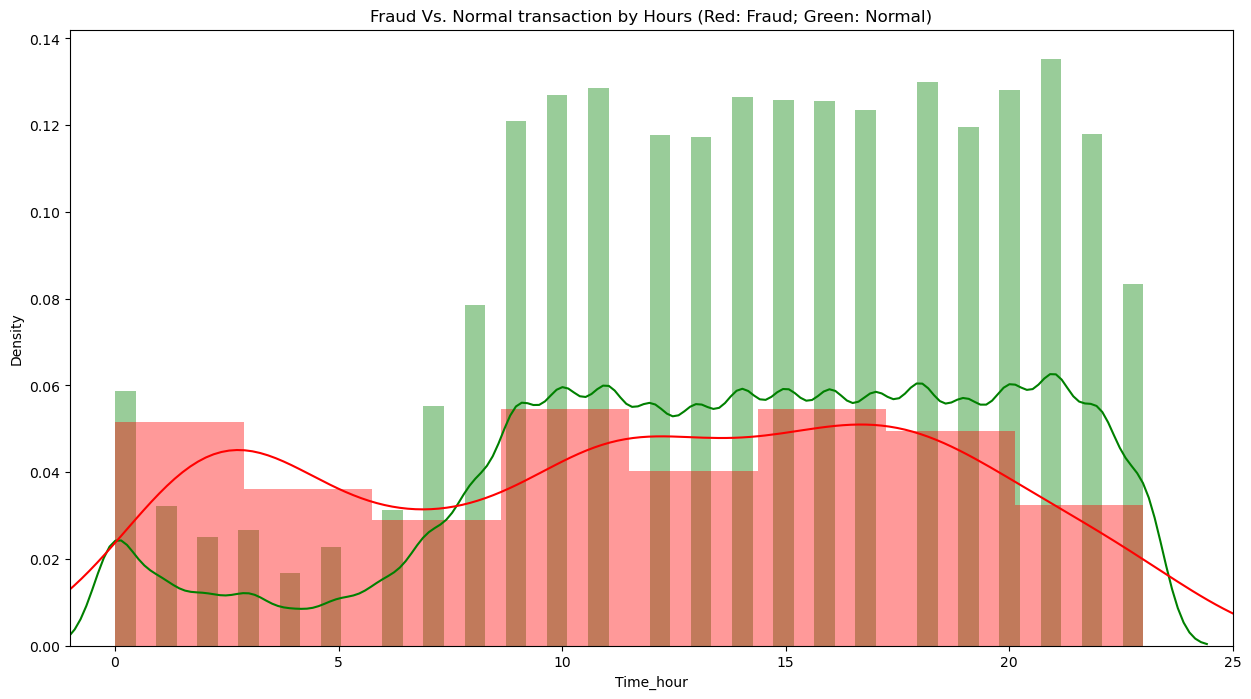

In [45]:
plt.figure(figsize=(15,8))
sns.distplot(data_new[data_new['Class']==0]['Time_hour'],color='g')
sns.distplot(data_new[data_new['Class']==1]['Time_hour'],color='r')
plt.title('Fraud Vs. Normal transaction by Hours (Red: Fraud; Green: Normal)',fontsize=12)
plt.xlim([-1,25])
plt.show()

<div style="background-color: #f0f8ff; padding: 10px 12px; border: 2px solid #007bff; border-radius: 10px;">
This confirms the pattern oberserved above about non-fraud and also shows that fraud transactions are much more uniform accorss the day.

<div style="background-color: #f0f8ff; padding: 10px 12px; border: 2px solid #007bff; border-radius: 10px;">

***CONCLUSIONS FROM EDA***
1. The data consisted of around 2,85,000 data points, 30 features including time and amount, and the labeled class of whether a transaction is actually fraud or not.
2. There were no null values present in the original dataset but the data was highly unbalanced with 99.83% of the data points being non-fraudulent transactions.
3. The time feature had a bimodal distribution i.e. peaks falling and rising. We can concluded that the peaks might fall due to lesser transactions during nighttime.
4. Very small proportion of transactions had amounts > 10,000 hence they were eliminated from the dataset.
5. Most of the fraudulent transactions were of small amounts (<1000 units - since we don’t know about the units about the currency).
6. The occurrence of fraudulent transactions was independent of the time of the day.

#  Data Preprocessing</p>
<a id="5"></a>
 ⬆️[Table Contents](#table_content)

# Checking null values

In [46]:
missing_values = df.isnull().sum()
missing_values

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

There is no missing data in the entire dataset

# Checking duplicates

In [47]:
duplicates = df.duplicated().sum()
print(f"\nNumber of Duplicates: {duplicates}")


Number of Duplicates: 1081


In [48]:
#Deleting duplicate columns
df = df.drop_duplicates()
df.shape

(283718, 31)

In [50]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [51]:
# Droping unneccesary column

df.drop('Time', axis=1, inplace=True)

# Data Scaling

In [52]:
#Scale amount by Standardization
ss = StandardScaler()
df['amount_scaled'] = ss.fit_transform(df['Amount'].values.reshape(-1,1))

# Train test split

In [65]:
# Prepare features and target
# Using Scikit-learn to split data into training and testing sets 

X = df.drop(['Class'], axis=1)
y = df['Class']

# Split the data into training and testing sets 
X_train, X_test, y_train, y_test = train_test_split( X,y, test_size = 0.2,stratify=df['Class'],random_state=123) 
print(X_train.shape,X_test.shape)

(226974, 30) (56744, 30)


In [66]:
#Inspect whether the 2 sets are indeed stratified.
print(pd.Series(y_train).value_counts(normalize = True))
print(pd.Series(y_test).value_counts(normalize = True))

Class
0    0.998335
1    0.001665
Name: proportion, dtype: float64
Class
0    0.998326
1    0.001674
Name: proportion, dtype: float64


# Handling imbalanced data

In [67]:
#Apply SMOTE to create synthetic observations from minority class

print("X_train: ",X_train.shape)
print("y_train: ",y_train.shape)
print("X_test: ",X_test.shape)
print("y_test: ",y_test.shape)

print('\n')
print('............')
print('\n')

from imblearn.over_sampling import SMOTE #Over sampling
smote= SMOTE()
X_train_smote,y_train_smote=smote.fit_resample(X, y)
X_test_smote, y_test_smote = X_test, y_test

print("X_train_smote: ",X_train_smote.shape)
print("y_train_smote: ",y_train_smote.shape)
print("X_test_smote: ",X_test_smote.shape)
print("y_test_smote: ",y_test_smote.shape)

X_train:  (226974, 30)
y_train:  (226974,)
X_test:  (56744, 30)
y_test:  (56744,)


............


X_train_smote:  (566490, 30)
y_train_smote:  (566490,)
X_test_smote:  (56744, 30)
y_test_smote:  (56744,)


# Feature Engineering

In [68]:
from sklearn.ensemble import RandomForestClassifier
rf =RandomForestClassifier (class_weight='balanced', random_state=123)
rf.fit(X_train,y_train)

RandomForestClassifier(class_weight='balanced', random_state=123)

In [69]:
importances = rf.feature_importances_
sorted(importances)

[0.004850423594596332,
 0.005965583036702008,
 0.00600259328849323,
 0.006175212516836362,
 0.006424623549017374,
 0.006605842370266407,
 0.0069618778252712185,
 0.007016628462358288,
 0.0071656173999045635,
 0.007820513027178623,
 0.008284227392091163,
 0.009525080873189325,
 0.009670650687351644,
 0.011342163702645618,
 0.011407126781987005,
 0.01147315015813109,
 0.011753569463648528,
 0.01230670680739388,
 0.013214648549604184,
 0.022580126623645017,
 0.023169164512948485,
 0.048341470469201286,
 0.05222732461431993,
 0.07064392438440663,
 0.07195513611928787,
 0.08498027598007814,
 0.09120041714577493,
 0.107603678311244,
 0.11093614977020559,
 0.15239609258222128]

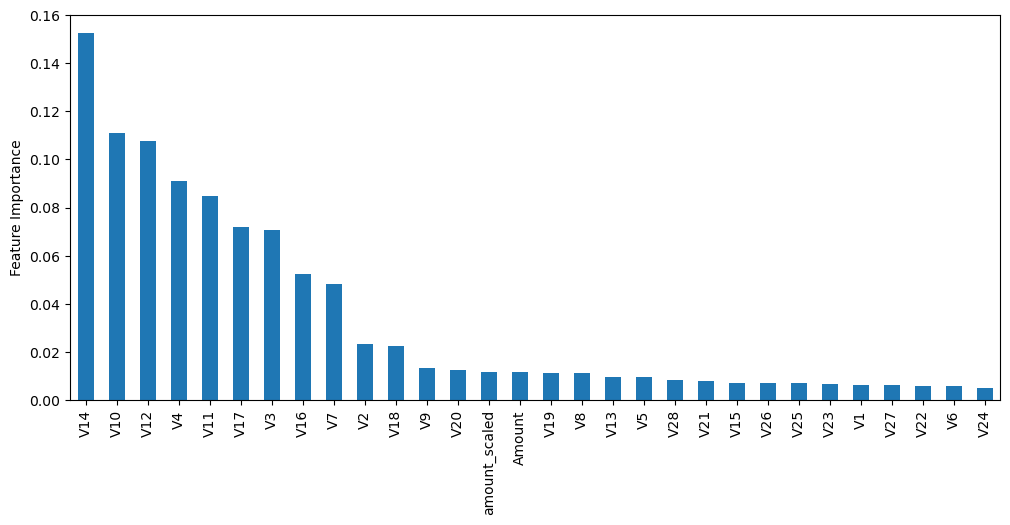

In [70]:
feature_importances = pd.Series(importances, index=X_train.columns)
fig, ax = plt.subplots(figsize=(12, 5))
feature_importances.sort_values(ascending=False).plot.bar(ax=ax)
ax.set_ylabel("Feature Importance")
plt.show()

# Model Selection and Model Training

As we have a classification problem on our hands we will apply classification models and calculate the cross validation score to identify the best fit for our data.

Some of the models that we are going to use are.

1.LogisticRegression


2.DecisionTreeClassifier


3.RandomForestClassifier


4.XGBoost


### Logistic Regression Model

In [71]:
lr = LogisticRegression(class_weight='balanced',max_iter=200, random_state=123)
lr.fit(X_train,y_train)

LogisticRegression(class_weight='balanced', max_iter=200, random_state=123)

In [72]:
pred_train = lr.predict(X_train)
pred = lr.predict(X_test)

In [73]:
matrix = confusion_matrix(y_test, pred)
matrix

array([[55286,  1363],
       [    8,    87]], dtype=int64)

In [74]:
models_results = pd.DataFrame(columns=['Recall', 'Precision', 'F1', 'AUC'])

In [75]:
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, accuracy_score
from sklearn import metrics
from imblearn.pipeline import Pipeline, make_pipeline

In [76]:
def model_eval(y_test, predicted):
        
    accuracy = accuracy_score(y_test, predicted)*100
    precision = precision_score(y_test, predicted)*100
    recall = recall_score(y_test, predicted)*100
    f1 = f1_score(y_test, predicted)
    confusion_matrix =metrics.confusion_matrix(y_test, predicted)
    cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=[False, True])
    cm_display.plot()
    plt.grid(False)
    plt.show()
    
    auc = np.NaN
    if auc:
        auc = metrics.roc_auc_score(y_test, predicted )*100
        fpr, tpr, threshold = roc_curve(y_test, predicted)
        plt.plot(fpr, tpr, label='Model', c='blue')
        plt.plot([0, 1], [0, 1], linestyle='--', c='yellow')
        plt.title("ROC Curve")
        plt.legend()
        plt.show()

    print('Accuracy:',accuracy  )
    print('Precision:', precision )
    print('Recall:', recall)
    print('F1 Score:', f1)
    print('AUC:', auc)
    print('Classification Report:',classification_report)
    
    return [recall, precision, f1, auc]

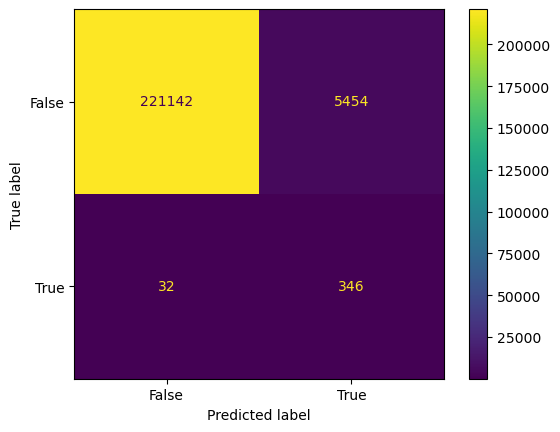

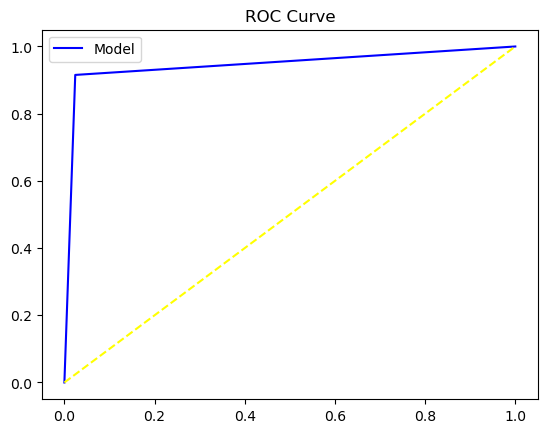

Accuracy: 97.5829830729511
Precision: 5.9655172413793105
Recall: 91.53439153439153
F1 Score: 0.1120103593395921
AUC: 94.5637323344785
Classification Report: <function classification_report at 0x00000212FF0D4820>


[91.53439153439153, 5.9655172413793105, 0.1120103593395921, 94.5637323344785]

In [77]:
model_eval(y_train,pred_train)

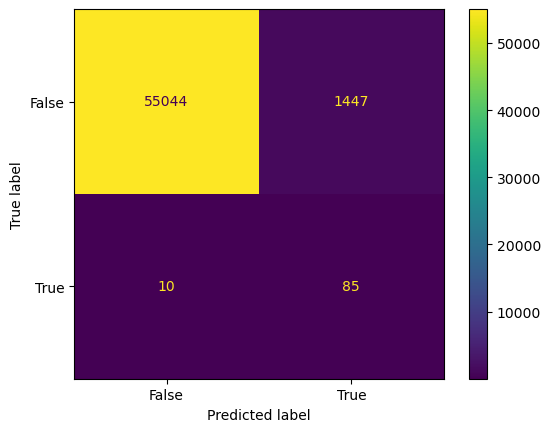

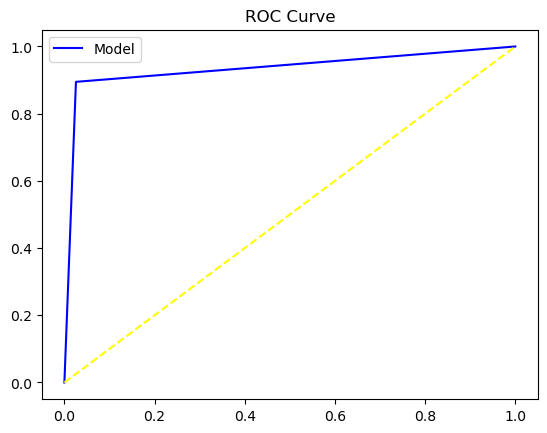

Accuracy: 97.42515816633089
Precision: 5.5483028720626635
Recall: 89.47368421052632
F1 Score: 0.10448678549477566
AUC: 93.45610712092937
Classification Report: <function classification_report at 0x0000022BC6A108B0>


[89.47368421052632, 5.5483028720626635, 0.10448678549477566, 93.45610712092937]

In [53]:
model_eval(y_test, pred)

### Hyperparameter Tuning 

Hyperparameters are the parameters that need to be set before training the machine
learning model. The values of these hyperparameters cannot be altered after the model has been
trained. They play a vital role in the performance of the model.

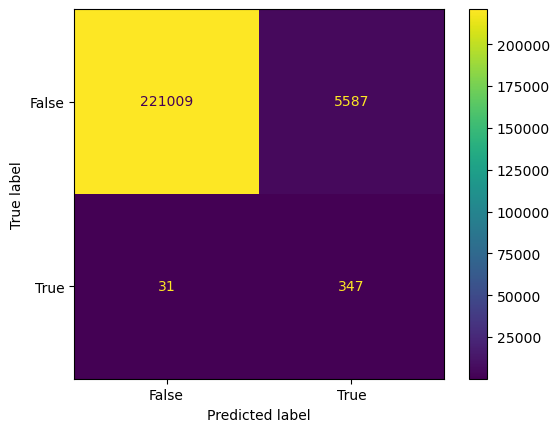

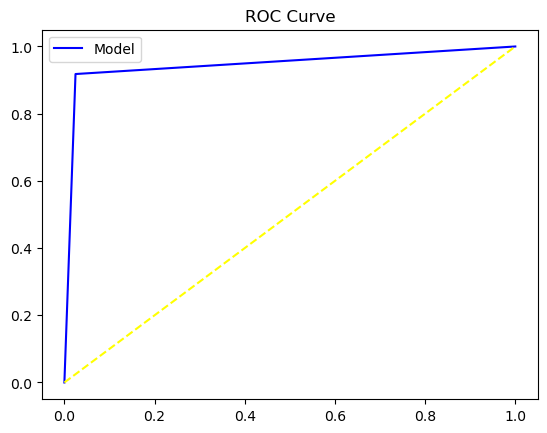

Accuracy: 97.52482663212525
Precision: 5.847657566565554
Recall: 91.7989417989418
F1 Score: 0.10994930291508238
AUC: 94.66666008198075
Classification Report: <function classification_report at 0x00000212FF0D4820>


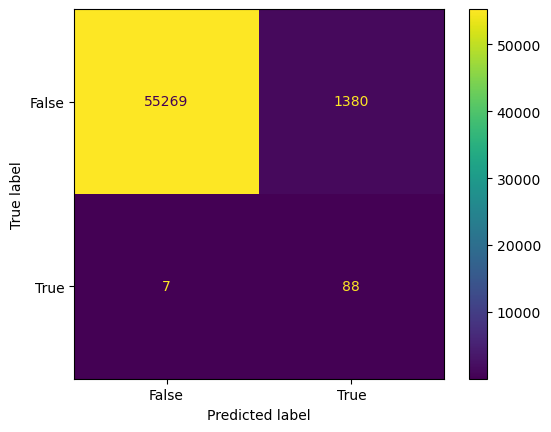

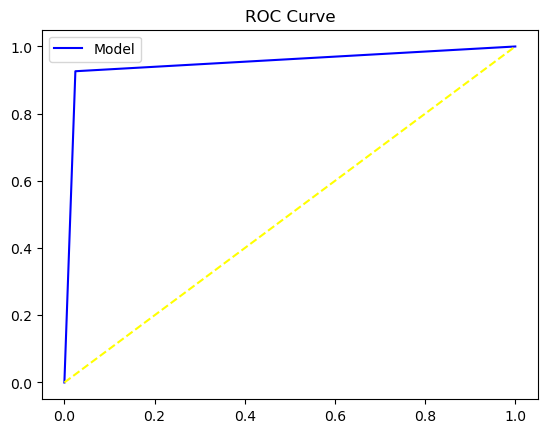

Accuracy: 97.55568870717609
Precision: 5.994550408719346
Recall: 92.63157894736842
F1 Score: 0.11260396673064618
AUC: 95.09776267709468
Classification Report: <function classification_report at 0x00000212FF0D4820>


NameError: name 'search' is not defined

In [79]:
#Hyperparameter Tuning of LogicalRegression Model
param_grid = {'C' : [0.1, 1, 10, 100]}

lrclf = LogisticRegression(class_weight='balanced', max_iter=200,random_state=123, n_jobs=-1)
lrsearch = GridSearchCV(lrclf, param_grid, cv=5, scoring='recall')
lrsearch.fit(X_train, y_train)
lrpred_train = lrsearch.predict(X_train)
lrpred = lrsearch.predict(X_test)
model_eval(y_train,lrpred_train)
model_eval(y_test, lrpred)
print('Best parameters: ', search.best_params_)

In [80]:
matrix_gslog= confusion_matrix(y_test, lrpred)
matrix_gslog

array([[55269,  1380],
       [    7,    88]], dtype=int64)

### Observations

Logistic Regression Model with hyperparameter tuning gives an accuracy of 97.55%. 

### Decision Tree Model

In [81]:
dt = DecisionTreeClassifier(random_state=123)
dt.fit(X_train,y_train)

DecisionTreeClassifier(random_state=123)

In [82]:
pred_train_dt = dt.predict(X_train)
pred_dt = dt.predict(X_test)

In [83]:
matrix_dt = confusion_matrix(y_test, pred_dt)
matrix_dt

array([[56629,    20],
       [   18,    77]], dtype=int64)

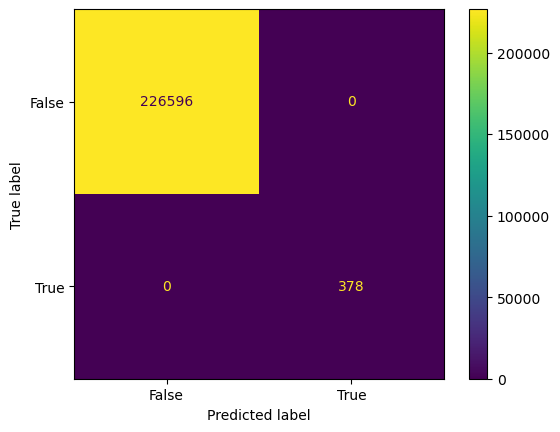

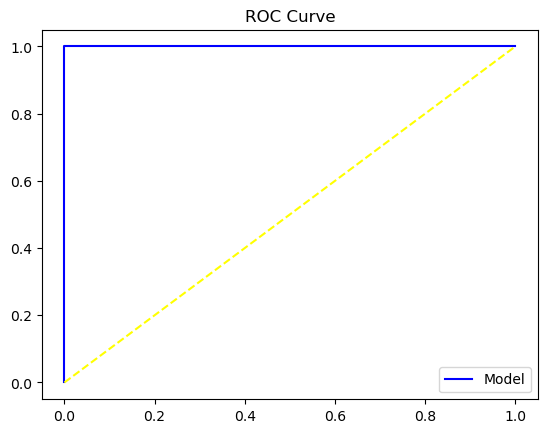

Accuracy: 100.0
Precision: 100.0
Recall: 100.0
F1 Score: 1.0
AUC: 100.0
Classification Report: <function classification_report at 0x00000212FF0D4820>


[100.0, 100.0, 1.0, 100.0]

In [84]:
model_eval(y_train,pred_train_dt )

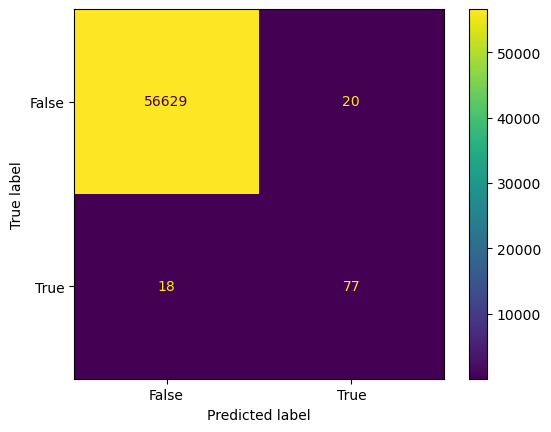

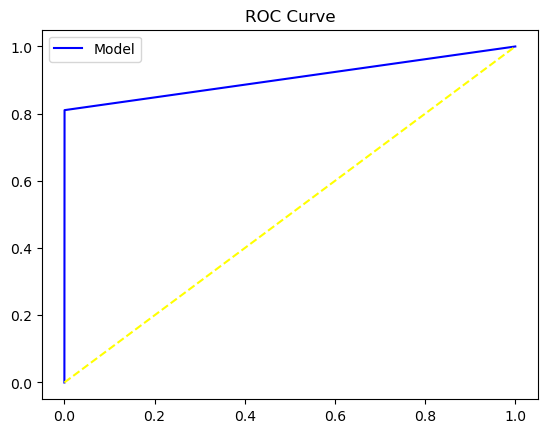

Accuracy: 99.93303256731988
Precision: 79.38144329896907
Recall: 81.05263157894737
F1 Score: 0.8020833333333334
AUC: 90.50866322720427
Classification Report: <function classification_report at 0x00000212FF0D4820>


[81.05263157894737, 79.38144329896907, 0.8020833333333334, 90.50866322720427]

In [85]:
model_eval(y_test,pred_dt)

In [86]:
from sklearn.model_selection import GridSearchCV
parameters = {
    'max_depth': [1,2,3,4,5,6,7,8,9,10],
   'min_samples_split' : [10,20,30,40,50,60]    
}
grid_search_dt = GridSearchCV(estimator = dt,
                             param_grid = parameters,
                             scoring = 'accuracy',
                             cv = 10,
                             n_jobs = -1)
grid_search_dt = grid_search_dt.fit(X_train,y_train)
best_accuracy = grid_search_dt.best_score_
best_parameters = grid_search_dt.best_params_

In [87]:
pred_gstrain_dt = grid_search_dt.predict(X_train)
pred_gstest_dt = grid_search_dt.predict(X_test)

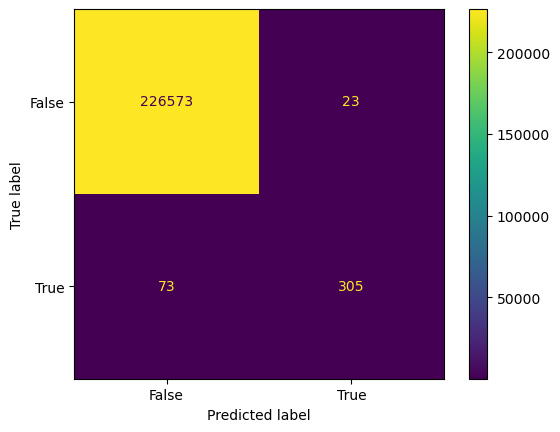

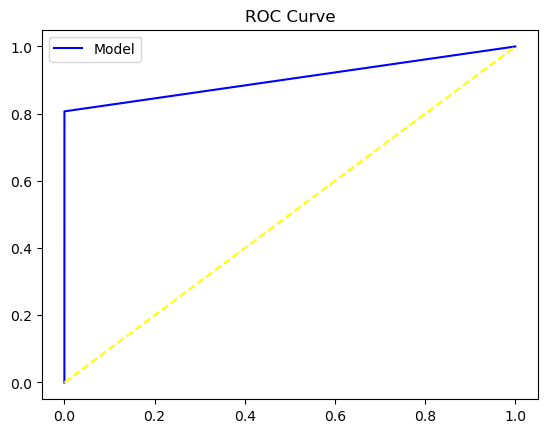

Accuracy: 99.95770440667214
Precision: 92.98780487804879
Recall: 80.68783068783068
F1 Score: 0.8640226628895185
AUC: 90.33884023226288
Classification Report: <function classification_report at 0x00000212FF0D4820>


[80.68783068783068, 92.98780487804879, 0.8640226628895185, 90.33884023226288]

In [88]:
model_eval(y_train, pred_gstrain_dt)

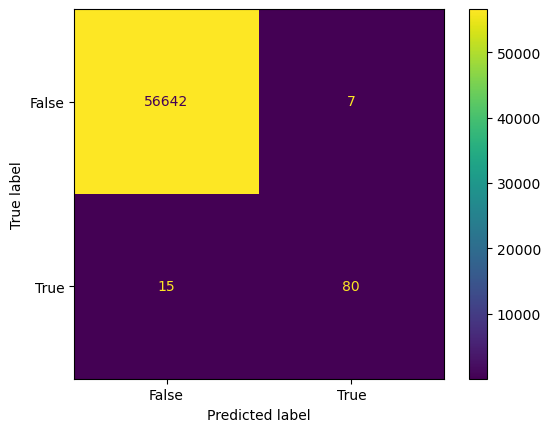

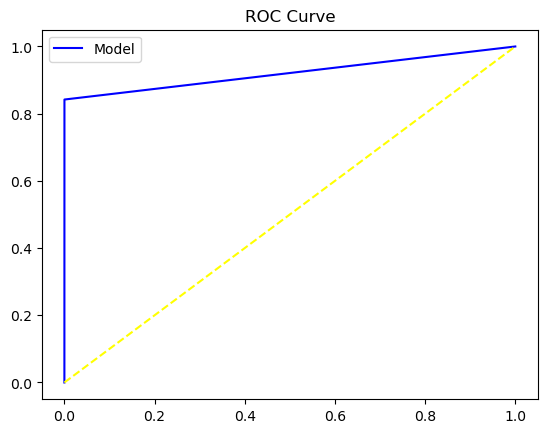

Accuracy: 99.96122938107995
Precision: 91.95402298850574
Recall: 84.21052631578947
F1 Score: 0.879120879120879
AUC: 92.09908476110044
Classification Report: <function classification_report at 0x00000212FF0D4820>


[84.21052631578947, 91.95402298850574, 0.879120879120879, 92.09908476110044]

In [89]:
model_eval(y_test,pred_gstest_dt)

In [90]:
matrix_gs_dt = confusion_matrix(y_test, pred_gstest_dt)
matrix_gs_dt

array([[56642,     7],
       [   15,    80]], dtype=int64)

### Observations

Our Decision Tree Model is giving 99.93% Accuracy. Hyperparameter Tuning for Decision Tree increased the Accuracy to 99.96%.

Obtained 91.95% precision, 84.21% recall and 87.91% f1 score

### Random Forest

In [91]:
from sklearn.ensemble import RandomForestClassifier

In [92]:
rf = RandomForestClassifier(max_depth=110, min_samples_split=10, random_state = 123, n_jobs=-1)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=110, min_samples_split=10, n_jobs=-1,
                       random_state=123)

In [93]:
pred_train_rf = rf.predict(X_train)
pred_rf = rf.predict(X_test)

In [94]:
matrix_rf = confusion_matrix(y_test, pred_rf)
matrix_rf

array([[56643,     6],
       [   19,    76]], dtype=int64)

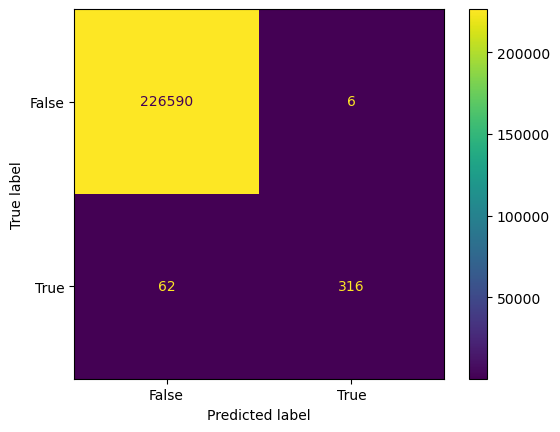

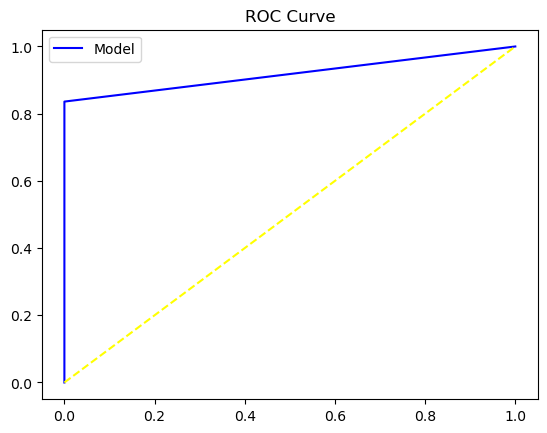

Accuracy: 99.97004062139277
Precision: 98.13664596273291
Recall: 83.5978835978836
F1 Score: 0.9028571428571428
AUC: 91.79761785677158
Classification Report: <function classification_report at 0x00000212FF0D4820>


[83.5978835978836, 98.13664596273291, 0.9028571428571428, 91.79761785677158]

In [95]:
model_eval(y_train, pred_train_rf)

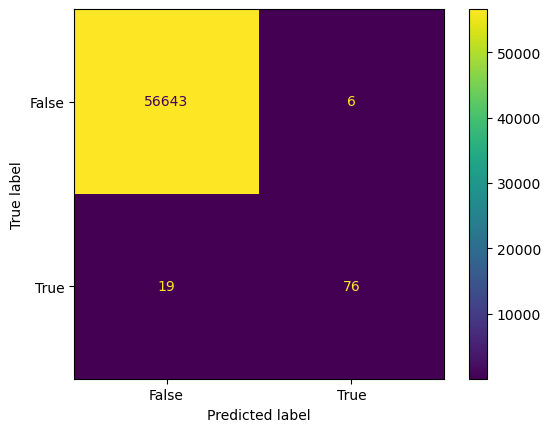

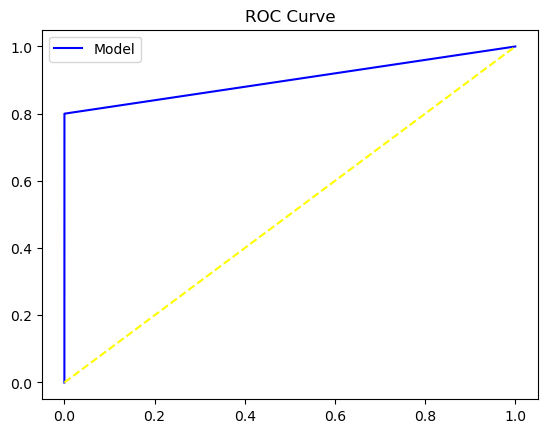

Accuracy: 99.95594247849992
Precision: 92.6829268292683
Recall: 80.0
F1 Score: 0.8587570621468926
AUC: 89.99470423131918
Classification Report: <function classification_report at 0x00000212FF0D4820>


[80.0, 92.6829268292683, 0.8587570621468926, 89.99470423131918]

In [96]:
model_eval(y_test, pred_rf)

Random Forest Classifier gives an accuracy of 99.95%.

Obtained 92.68% precision, 80% recall and 85% f1 score and 89% AOC score.

## Model Evaluation
Now we have our best set models, now we move onto testing them on different metrices so as to know which one works best overall for us.

1. LogisticRegression
2. Logical Regression with hyperparameter Tuning
3. Decision Tree 
4. Decision Tree with hyperparameter Tuning
5. Random Forest


we'll evaluate model using:

ROC AUC Score

ROC Curve

Confusion Matrix

Classification report



In [98]:
from sklearn.metrics import roc_auc_score

print('Logistic Regression: ', roc_auc_score(y_test,pred))
print('Logistic Regression_GridSearchCV: ', roc_auc_score(y_test,lrpred))
print('Decision Tree Classifier: ', roc_auc_score(y_test, pred_dt))
print('Decision Tree Classifier_GridSearchCV: ', roc_auc_score(y_test, pred_gstest_dt))
print('Random Forest: ', roc_auc_score(y_test,pred_rf))

Logistic Regression:  0.9458645156555
Logistic Regression_GridSearchCV:  0.9509776267709468
Decision Tree Classifier:  0.9050866322720427
Decision Tree Classifier_GridSearchCV:  0.9209908476110045
Random Forest:  0.8999470423131918


**Logistic Regression Classifier has best roc_auc_score.**

In [99]:
#Evaluating using ROC Curve
log_fpr, log_tpr, log_threshold = roc_curve(y_test, pred)
log_gridsearch_fpr,log_gridsearch_tpr,log_gridsearch_threshold = roc_curve(y_test,lrpred)

dt_fpr, dt_tpr, dt_threshold = roc_curve(y_test, pred_dt)
dt_gridsearch_fpr, dt_gridsearch_tpr, dt_gridsearch_threshold = roc_curve(y_test, pred_gstest_dt)

rf_fpr, rf_tpr, rf_threshold = roc_curve(y_test, pred_rf)

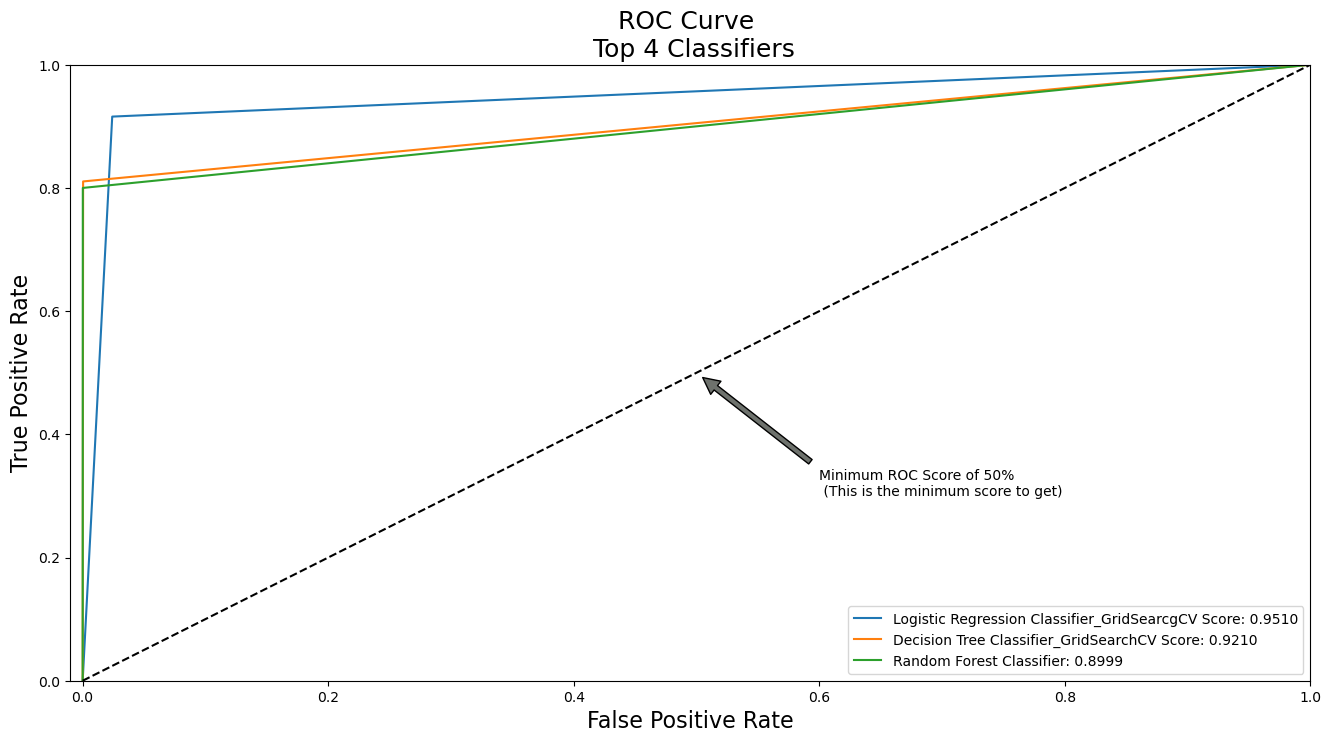

In [101]:
plt.figure(figsize=(16,8))
plt.title('ROC Curve \n Top 4 Classifiers', fontsize=18)
plt.plot(log_fpr, log_tpr, label='Logistic Regression Classifier_GridSearcgCV Score: {:.4f}'.format(roc_auc_score(y_test, lrpred)))
plt.plot(dt_fpr,dt_tpr, label='Decision Tree Classifier_GridSearchCV Score: {:.4f}'.format(roc_auc_score(y_test, pred_gstest_dt)))
plt.plot(rf_fpr, rf_tpr, label='Random Forest Classifier: {:.4f}'.format(roc_auc_score(y_test, pred_rf)))

plt.plot([0, 1], [0, 1], 'k--')
plt.axis([-0.01, 1, 0, 1])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.annotate('Minimum ROC Score of 50% \n (This is the minimum score to get)', xy=(0.5, 0.5), xytext=(0.6, 0.3),
                arrowprops=dict(facecolor='#6E726D', shrink=0.05))
plt.legend()

**Logistic Regression Classifier GridSearch  has best ROC Curve followed by Random Forest Classifier.**

[Text(0, 0.5, ''), Text(0, 1.5, '')]

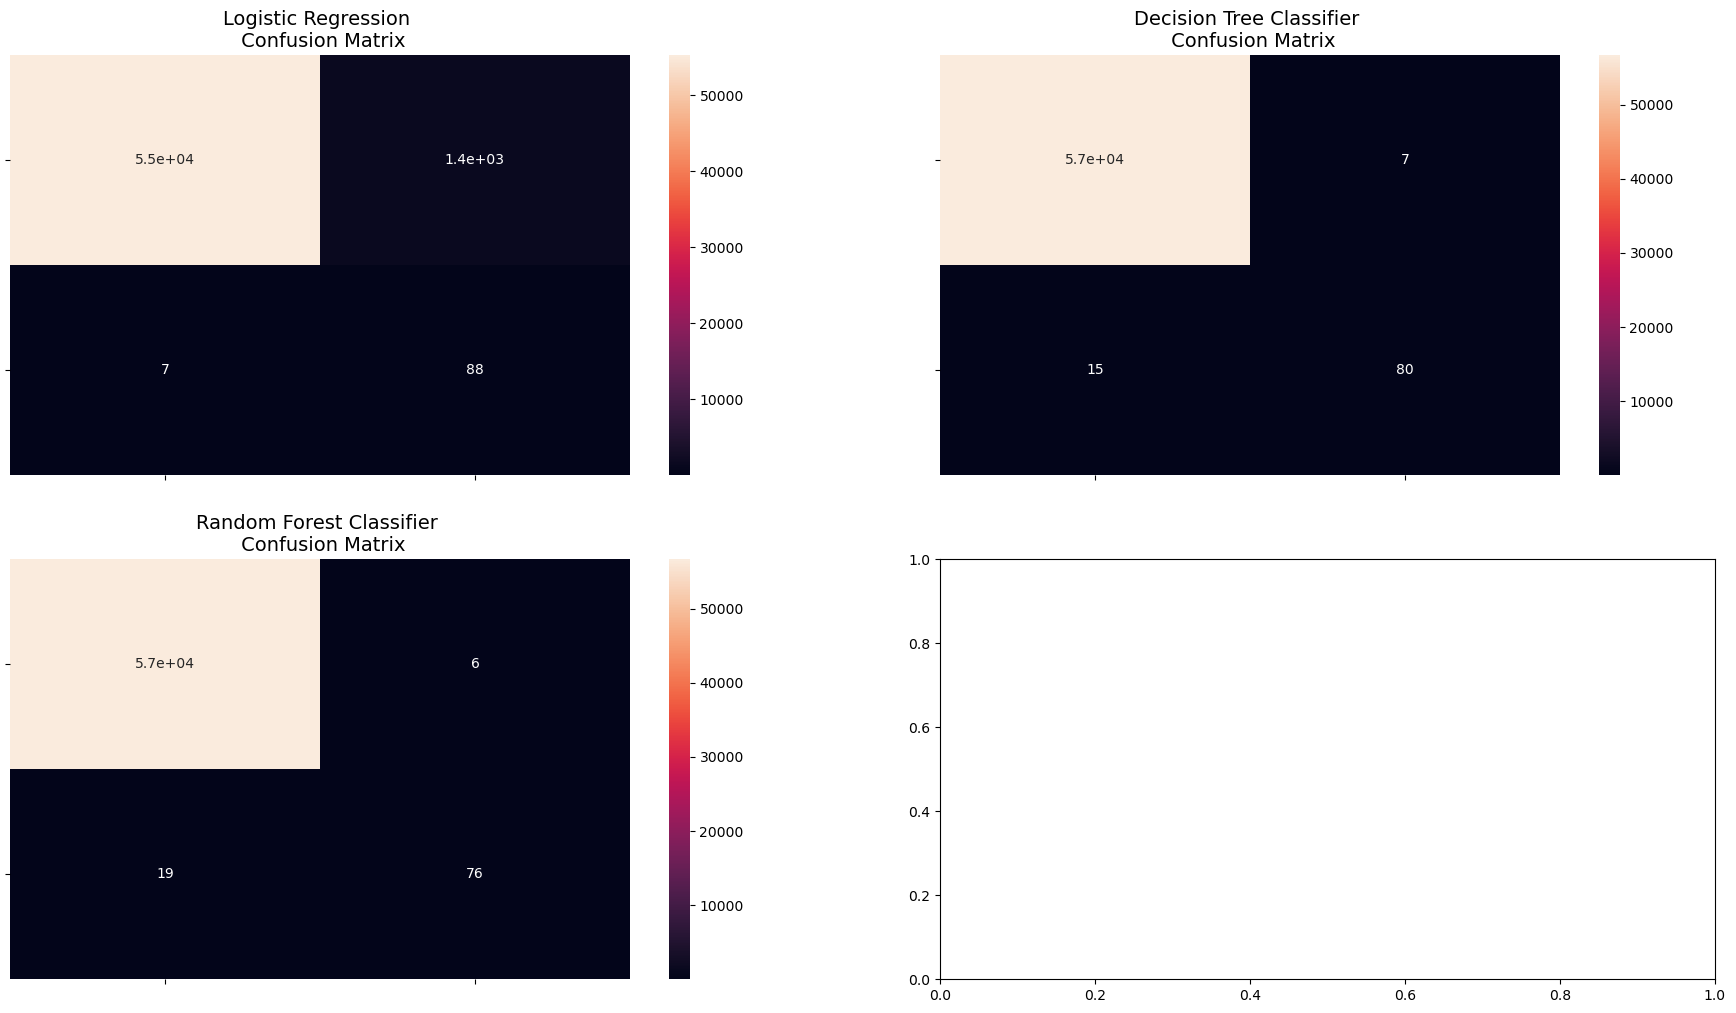

In [103]:
#Confusion Matrix

fig, ax = plt.subplots(2, 2,figsize=(22,12))

sns.heatmap(matrix_gslog, ax=ax[0][0], annot=True)
ax[0, 0].set_title("Logistic Regression \n Confusion Matrix", fontsize=14)
ax[0, 0].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[0, 0].set_yticklabels(['', ''], fontsize=14, rotation=360)

sns.heatmap(matrix_gs_dt, ax=ax[0][1], annot=True)
ax[0][1].set_title("Decision Tree Classifier \n Confusion Matrix", fontsize=14)
ax[0][1].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[0][1].set_yticklabels(['', ''], fontsize=14, rotation=360)

sns.heatmap(matrix_rf, ax=ax[1][0], annot=True)
ax[1][0].set_title("Random Forest Classifier \n Confusion Matrix", fontsize=14)
ax[1][0].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[1][0].set_yticklabels(['', ''], fontsize=14, rotation=360)





**From the Confusion Metrix, we can see that Logical Regression outperforms others followed by Random Forest and Decision Tree.**

Logical Regression Model



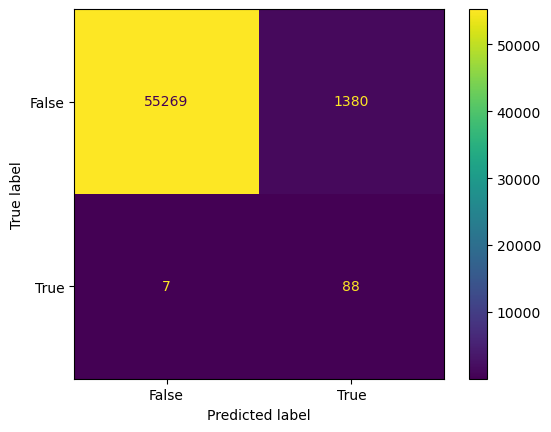

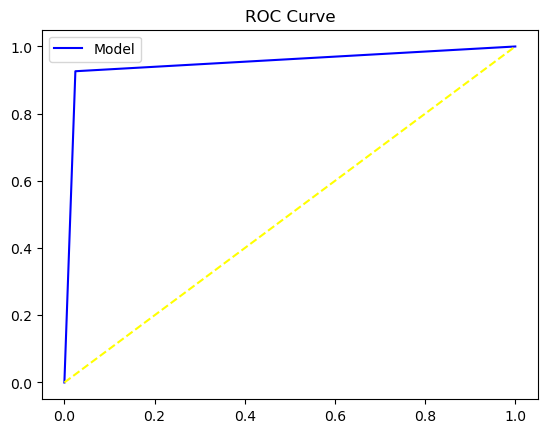

Accuracy: 97.55568870717609
Precision: 5.994550408719346
Recall: 92.63157894736842
F1 Score: 0.11260396673064618
AUC: 95.09776267709468
Classification Report: <function classification_report at 0x00000212FF0D4820>
Decision Tree Model



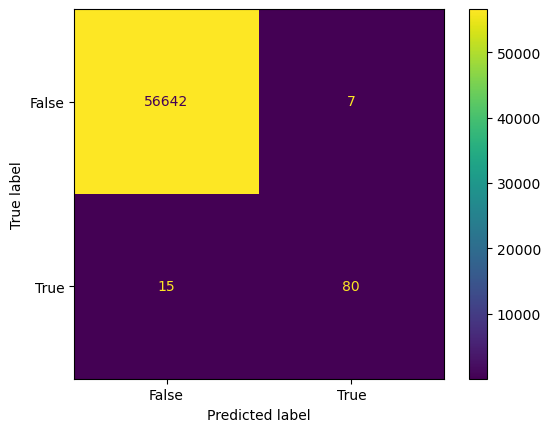

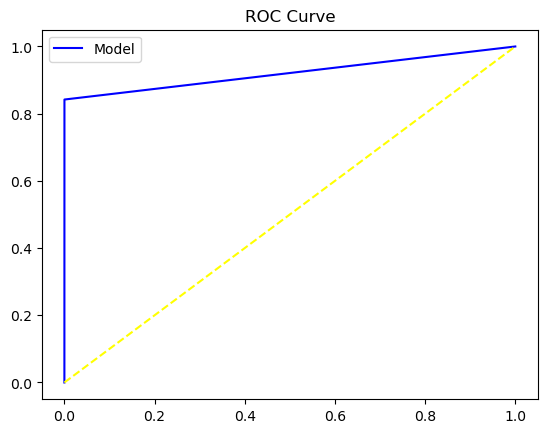

Accuracy: 99.96122938107995
Precision: 91.95402298850574
Recall: 84.21052631578947
F1 Score: 0.879120879120879
AUC: 92.09908476110044
Classification Report: <function classification_report at 0x00000212FF0D4820>
Random Forest Model



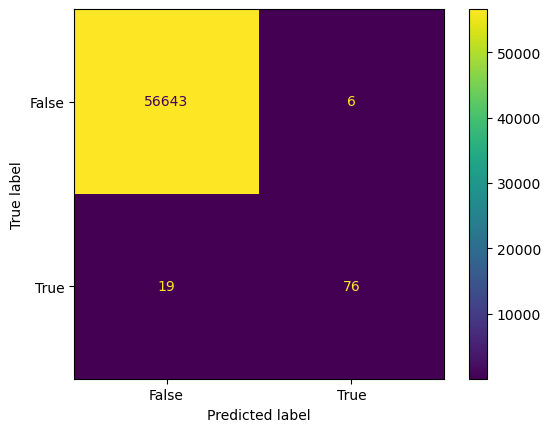

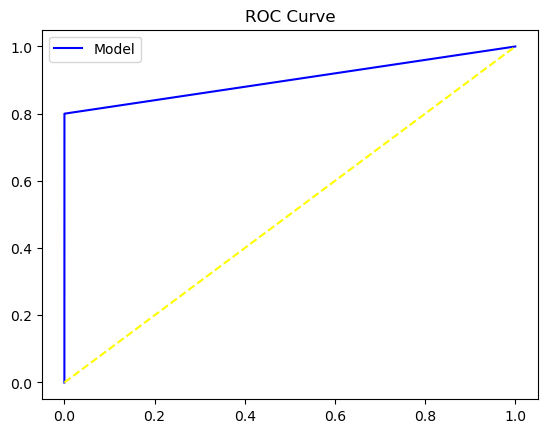

Accuracy: 99.95594247849992
Precision: 92.6829268292683
Recall: 80.0
F1 Score: 0.8587570621468926
AUC: 89.99470423131918
Classification Report: <function classification_report at 0x00000212FF0D4820>


(None, [80.0, 92.6829268292683, 0.8587570621468926, 89.99470423131918])

In [104]:
#Evaluation using classification report

Compare = print('Logical Regression Model\n'),model_eval(y_test,lrpred)
print('Decision Tree Model\n'),model_eval(y_test,pred_gstest_dt)
print('Random Forest Model\n'),model_eval(y_test,pred_rf)


In [106]:
acc_score = accuracy_score(y_test, lrpred)
print('Logistic Regression Model Accuracy is: ',round(acc_score * 100,2).astype(str) + '%')

acc_score = accuracy_score(y_test, pred_gstest_dt)
print('Decision Tree Model Accuracy is : ',round(acc_score * 100,2).astype(str) + '%')

acc_score = accuracy_score(y_test, pred_rf)
print('Random Forest Classifier Accuracy : ',round(acc_score * 100,2).astype(str) + '%')

Logistic Regression Model Accuracy is:  97.56%
Decision Tree Model Accuracy is :  99.96%
Random Forest Classifier Accuracy :  99.96%


**Decision Tree and Random Forest Classifier gives a better accuracy score of 99.94%**